In [3]:
# Ignorar sklearn warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='skimage')

# Librería de ámbito matemático, científico y de ingeniería. En nuestro caso, solo usamos la convolución.
from scipy.ndimage import convolve

# Librería para la computación científica. En nuestro caso, la usamos por la representación de datos y hacer calculas de forma
# rápida.
import numpy as np

# Librerías de visión por computador
# OpenCV: Generalista.
# Skimage: Generalista.
# Dlib: Menos funcionalidades, muy rápido e implementaciones muy interesantes.
import dlib
import cv2
from skimage import io
from skimage import color
from skimage import filters
from skimage import util

# Librerías para gráficos en 2d/3d. En nuestro caso para mostrar las imágenes y gráficos en general.
from matplotlib import pyplot as plt

# Necesario para visualizar los resultados en la misma página.
%matplotlib inline

# Fundamentos


In [4]:
!dir resources

 El volumen de la unidad C es Windows
 El número de serie del volumen es: AE53-B5B9

 Directorio de C:\Users\carles.carmonacalpe\Desktop\Repos\computer_vision_course\resources

20/05/2018  20:30    <DIR>          .
20/05/2018  20:30    <DIR>          ..
09/04/2018  11:33         2.414.737 dlib-19.8.1-cp36-cp36m-win_amd64.whl
20/05/2018  20:36               107 requeriments.txt
19/05/2018  10:31    <DIR>          session1
20/05/2018  20:41    <DIR>          session2
               2 archivos      2.414.844 bytes
               4 dirs  334.729.408.512 bytes libres


## Cargar una imagen en BN o RGB

In [5]:
# Si la imagen es grayscale se puede cargar directamente.
img_grayscale = io.imread("resources/session1/altran_grayscale.png")

# Si la imagen es en color pero la queremos cargar en grayscale hay dos opciones
# 1. Usar imread con el parámetro as_grey=True (el tipo será float64).
print("Tiempo gastado en la opción 1:")
%time img_grayscale = io.imread("resources/session1/altran.jpg", as_grey=True)
# Convertir a uint8.
%time img_grayscale = img_grayscale.astype(np.uint8)

# 2. Cargar la imagen en color y convertirla.
print("Tiempo gastado en la opción 2:")
%time img = io.imread("resources/session1/altran.jpg")
%time img_grayscale = color.rgb2gray(img)

Tiempo gastado en la opción 1:
Wall time: 15 ms
Wall time: 0 ns
Tiempo gastado en la opción 2:
Wall time: 0 ns
Wall time: 10 ms


## Mostrar imagen/es
La forma más sencilla para mostrar las imágenes es usar matplotlib con la instrucción imshow(), el uso más básico se muestra a continuación pero podéis encontrar muchos mas ejemplos de uso en https://matplotlib.org/users/image_tutorial.html

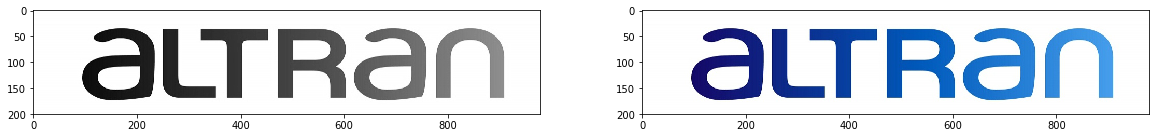

In [6]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
# Grayscale
ax0.imshow(img_grayscale, cmap='gray');
# Color
ax1.imshow(img);

### Dimensiones de una imagen

Tipo de imagen | Coordenadas
-- | --
2D grayscale | 	(filas, columnas)
2D multicanal | (filas, columnas, canal)
3D grayscale | 	(plano, filas, columnas)
3D multicanal | (plano, filas, columnas, canal)

## Las imágenes son numpy arrays!!!
Las imágenes se representan en scikit-image usando los standards definidos en numpy. Esto maximiza la inter-operabilidad con otras librerías en el ecosistema del Python científico, como por ejemplo son el caso de matplotlib, sklearn, opencv, dlib o scipy.


In [7]:
print("Dimensiones (Grayscale):", img_grayscale.shape)
print("Dimensiones (Color):", img.shape)

Dimensiones (Grayscale): (200, 980)
Dimensiones (Color): (200, 980, 3)


### Tipos de datos y valores en la imagen

Tipo de datos | Valores
-- | --
bool  |     de 0 a 1
uint8  |     de 0 a 255
uint16  |    de 0 a 65535
uint32  |   de 0 a 4294967295
uint64  |   de 0 a 18446744073709551615
int8    |   de -128 a 127
int16   |   de -32768 a 32767
int32   |   de -2147483648 a 2147483647
int64   |   de -9223372036854775808 a 9223372036854775807
float32  |   números reales (coma flotante) de 32 bits (según IEEE-754)
float64  |  números reales (coma flotante) de 64 bits (según IEEE-754)

Scikit-image permite todas las convenciones determinando el tipo de datos del array. Por ejemplo determinando np.uint8 estamos usando el rango de 0-255. Mirar este ejemplo:

Linspace
********************************
[0.00000000e+00 4.00160064e-04 8.00320128e-04 ... 9.99199680e-01
 9.99599840e-01 1.00000000e+00]
[0.00000000e+00 1.02040816e-01 2.04081633e-01 ... 2.53775510e+02
 2.53877551e+02 2.53979592e+02]
[  0   0   0 ... 252 252 252]

Ejemplo
********************************
Linear0: float64 0.0 1.0
Linear1: uint8 0 255


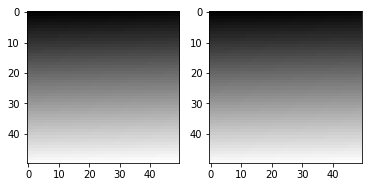

In [8]:
# + info: https://matplotlib.org/tutorials/colors/colormaps.html
print("Linspace\n"+ "*"*32)
print(np.linspace(0, 1, 2500))
print(np.linspace(0, 255, 2500)[:-10])
print(np.linspace(0, 255, 2500)[:-10].astype(np.uint8)[:-10])
print("\nEjemplo\n" + "*"*32)
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

### Generar imágenes
Como las imágenes se representan con numpy, podemos definir fácilmente una imagen, a continuación dos ejemplos:

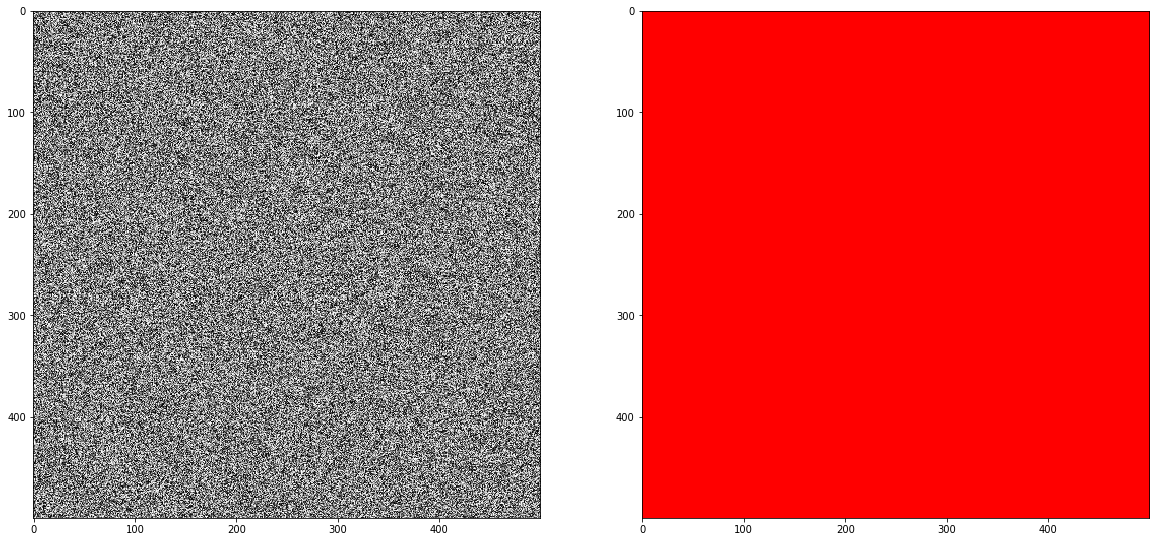

In [9]:
# Imagen a partir de valores aleatorios.
random_image = np.random.random([500, 500])

# Imagen en rojo.
red_image = np.zeros((500, 500, 3))
red_image[:,:,0] = 1

# Mostrar las imágenes.
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(random_image, cmap='gray');
ax1.imshow(red_image);

### Modificar imágenes
De la misma manera que generar imágenes es fácil, lo mismo sucede con la modificación. A continuación varios ejemplos con diferentes casos de uso.

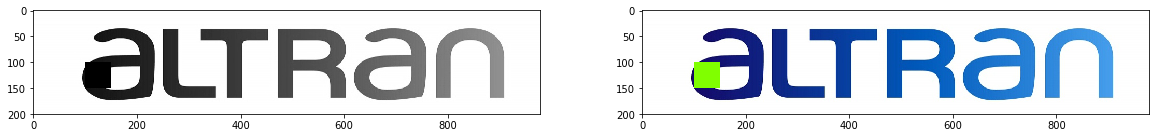

In [12]:
# Ej 1: Dibujar un cuadrado de forma "manual".

# Grayscale.
img_grayscale_copy = img_grayscale.copy()
img_grayscale_copy[100:150,100:150] = 0

# Color.
img_copy = img.copy()
img_copy[100:150,100:150, :] = (128, 255, 0)

# Mostrar las imágenes.
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(img_grayscale_copy, cmap='gray');
ax1.imshow(img_copy);

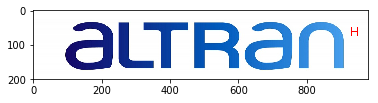

In [13]:
# Ej. 2: Método para dibujar una letra H en las coordenadas especificadas de forma "manual"
def dibujar_H(image, coords, color=(255, 0, 0), in_place=False):
    """
    Este metódo dibuja una H en las coordenadas específicadas con el color específicado.
    
    Parameters
    ----------
    image: np.array()
        Imagen de entrada.
    coords: tuple of int
        (Coordenada X, Coordenada Y)
    color: tuple of int
        RGB color (R, G , B)
    in_place: boolean
        Devolver una copia de la imagen o la misma imagen
    
    Returns
    -------
    np.array()
        Imagen con la H dibujada.
    """
    if in_place:
        out = image
    else:
        out = image.copy()
    
    canvas = out[coords[0]:coords[0] + 24,
                 coords[1]:coords[1] + 20]
    
    canvas[:, :3] = color
    canvas[:, -3:] = color
    canvas[11:15] = color
    
    return out

img_copy = img.copy()
img_copy_H = dibujar_H(img_copy, (50, -50))
plt.imshow(img_copy_H);

**ALERTA para navegantes: Estos ejemplos SOLO són útiles para entender como se representa una imagen, para escribir texto o dibujar en una imagen existen métodos específicos para ello en las diferentes librerías de visión por computador**

Ahora introduciremos la líbreria OpenCV que incluye algorítmos de Visión por computador, pero además metodos para dibujar facilmente en nuestras imagenes y de esta forma marcar nuestros puntos de interés!

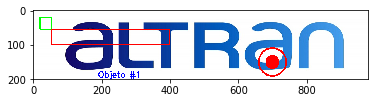

In [14]:
# OpenCV:  Texto, círculo y texto. Identificar cual corresponde a cada instrucción.
img_copy = img.copy()
cv2.rectangle(img_copy, (20, 20), (55, 55), (0, 255, 0), 2)
cv2.rectangle(img_copy, (400,100), (55, 55), (255, 0, 0), 2)
cv2.circle(img_copy, (700, 150), 40, (255, 0, 0), 4)
cv2.circle(img_copy, (700, 150), 20, (255, 0, 0), -1)
cv2.putText(img_copy, "Objeto #" + str(1), (190,195),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
plt.imshow(img_copy);


## Ejercicios propuestos

__Ejercicio 1: Implementar un método que dada una posición de píxel te devuelva su valor.__

In [15]:
def get_pixel_value(image, coords):
    """
    Devuelve el valor RGB de un píxel en una imagen.
    
    Parameters
    ----------
    image: np.array()
        Imagen de entrada.
    coords: tuple of int
        (Coordenada X, Coordenada Y).
    
    Return
    ------
    tuple of int
        Valor del píxel.
    """
    # Aquí tu código
    color_tuple = ()
    
    return color_tuple

# Estas líneas verifican tu implementación si devuelven True el resultado es correcto.
print(get_pixel_value(img, (150,150)) == (252, 253, 247))
print(get_pixel_value(img_grayscale, (150,150)) == 0)


False
False


___Ejercicio 2: Añadir el código necesario para tener una función similar a la anterior pero con el objetivo de dibujar una L___

In [ ]:
def dibujar_L(image, coords, color=(255, 0, 0), in_place=False):
    """
    Este metódo dibuja una letra L en las coordenadas específicadas con el color específicado.
    
    Parameters
    ----------
    image: np.array()
        Imagen de entrada.
    coords: tuple of int
        (Coordenada X, Coordenada Y)
    color: tuple of int
        RGB color (R, G , B)
    in_place: boolean
        Devolver una copia de la imagen o la misma imagen
    
    Returns
    -------
    np.array()
        Imagen con la letra L dibujada.
    """
    if in_place:
        out = image
    else:
        out = image.copy()
    
    # Aquí tu código
    
    return out

# Estas líneas muestran la imágen para verificar visualmente el resultado.
img_copy = img.copy()
img_copy_H = dibujar_L(img_copy, (50, -50))
plt.imshow(img_copy_H);

___Ejercicio 3: Añadir el código necesario para dibujar un cuadrado en la boca y dos círculos en los ojos del personaje que aparece a continuación___

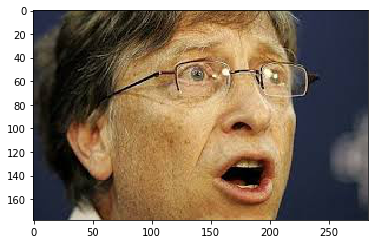

In [16]:
# Carga una nueva imagen
img_copy = io.imread("resources/session1/billy.jpg")
# Aquí vuestro código

# Estas líneas muestran la imágen para verificar visualmente el resultado.
plt.imshow(img_copy);

# Filtrado de imagen

## Filtros locales en imagen
Para este primer ejemplo vamos a usar un caso bien simple para reforzar la comprensión de lo que hemos explicado previamente.


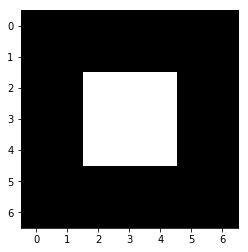

In [17]:
# Generamos una imagen para luego aplicarle nuestro filtro.
cuadrado_blanco = np.zeros((7, 7), dtype=float)
cuadrado_blanco[2:5, 2:5] = 1

# Mostramos la imagen generada.
plt.imshow(cuadrado_blanco, cmap="gray");


## Filtro promedio
Usaremos como primer ejemplo de filtro, lo que se conoce como el filtro "promedio". Para cada píxel un kernel define que píxel vecinos se deben considerar y que peso tienen en nuestro resultado final, de esta forma aplicar un filtro lineal consistirá en:

* Centrar el kernel en un píxel actual.
* Multiplicar los pixeles afectados con el kernel.
* Sumar todos los resultados.
* Reemplazar el valor del píxel central con el resultado de la suma.

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


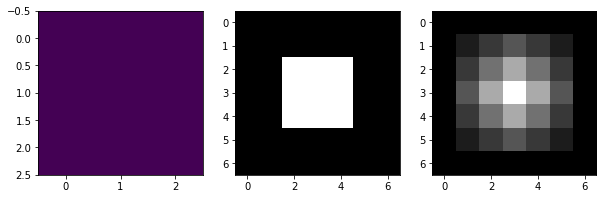

In [18]:
filtro_promedio = 1.0/9.0 * np.ones((3, 3))

# Muestra los valores
print(filtro_promedio)
print(cuadrado_blanco)
print(convolve(filtro_promedio, cuadrado_blanco))

# Muestra gráficamente. PD: Este es un ejemplo también de como mostrar varios gráficos en una misma celda.
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 10))
ax0.imshow(filtro_promedio);
ax1.imshow(cuadrado_blanco,  cmap='gray');
ax2.imshow(convolve(cuadrado_blanco, filtro_promedio),  cmap='gray');

### Demo interactiva

** Alerta: ** No pretendo que entendáis el código (todo y que no es muy complicado!) el objetivo principal es reforzar la comprensión de como funcionan los filtros.

In [19]:
#------------------------------------------------------------------------------------------------------------------------
#  From: https://tonysyu.github.io/ipython-jupyter-widgets-an-image-convolution-demo.html#.WstHHohubIU
#------------------------------------------------------------------------------------------------------------------------
from skimage import color
from scipy import ndimage as ndi
from matplotlib import patches

def mean_filter_demo(image, vmax=1):
    mean_factor = 1.0 / 9.0  # This assumes a 3x3 kernel.
    iter_kernel_and_subimage = iter_kernel(image)

    image_cache = []

    def mean_filter_step(i_step):
        while i_step >= len(image_cache):
            filtered = image if i_step == 0 else image_cache[-1][-1][-1]
            filtered = filtered.copy()

            (i, j), mask, subimage = next(iter_kernel_and_subimage)
            filter_overlay = color.label2rgb(mask, image, bg_label=0,
                                             colors=('cyan', 'red'))
            filtered[i, j] = np.sum(mean_factor * subimage)
            image_cache.append(((i, j), (filter_overlay, filtered)))

        (i, j), images = image_cache[i_step]
        fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
        
        for ax, imc in zip(axes, images):
            ax.imshow(imc, vmax=vmax)
            rect = patches.Rectangle([j - 0.5, i - 0.5], 1, 1, color='yellow', fill=False)
            ax.add_patch(rect)
            
        plt.show()
    return mean_filter_step


def mean_filter_interactive_demo(image):
    from ipywidgets import IntSlider, interact
    mean_filter_step = mean_filter_demo(image)
    step_slider = IntSlider(min=0, max=image.size-1, value=0)
    interact(mean_filter_step, i_step=step_slider)


def iter_kernel(image, size=1):
    """ Yield position, kernel mask, and image for each pixel in the image.

    The kernel mask has a 2 at the center pixel and 1 around it. The actual
    width of the kernel is 2*size + 1.
    """
    width = 2*size + 1
    for (i, j), pixel in iter_pixels(image):
        mask = np.zeros(image.shape, dtype='int16')
        mask[i, j] = 1
        mask = ndi.grey_dilation(mask, size=width)
        #mask[i, j] = 2
        subimage = image[bounded_slice((i, j), image.shape[:2], size=size)]
        yield (i, j), mask, subimage


def iter_pixels(image):
    """ Yield pixel position (row, column) and pixel intensity. """
    height, width = image.shape[:2]
    for i in range(height):
        for j in range(width):
            yield (i, j), image[i, j]


def bounded_slice(center, xy_max, size=1, i_min=0):
    slices = []
    for i, i_max in zip(center, xy_max):
        slices.append(slice(max(i - size, i_min), min(i + size + 1, i_max)))
    return slices

In [20]:
mean_filter_interactive_demo(cuadrado_blanco)

interactive(children=(IntSlider(value=0, description='i_step', max=48), Output()), _dom_classes=('widget-inter…

## Ejercicios propuestos


___Ejercicio 1: Tratar de describir/descubrir el efecto que producen los siguientes kernel (podéis buscar en Wikipedia...)___

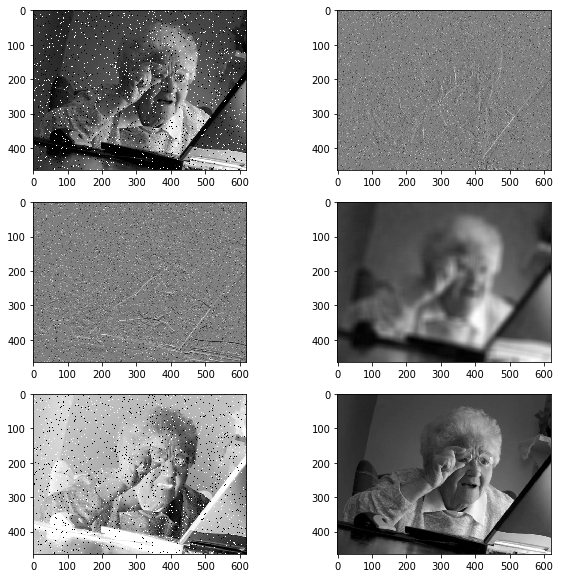

In [21]:
from scipy import ndimage as ndi

# Cargar la imagen
img_copy = io.imread("resources/session1/abu.jpg")
img_copy = color.rgb2gray(img_copy)
img_copy = util.random_noise(img_copy, mode="s&p")

# Definir los filtros
filtro1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filtro2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
filtro3 = np.ones((22,22)) / 484.
filtro4 = np.array([[0, 0, 0], [0, -1, 0], [0, 0, 0]])

img_filtro1 = ndi.convolve(img_copy, filtro1)
img_filtro2 = ndi.convolve(img_copy, filtro2)
img_filtro3 = ndi.convolve(img_copy, filtro3)
img_filtro4 = ndi.convolve(img_copy, filtro4)
img_filtro5 = filters.median(img_copy.astype(np.float64))

# Aquí tu código
f, ((ax0, ax1),(ax2, ax3), (ax4, ax5)) = plt.subplots(3, 2, figsize=(10, 10))
ax0.imshow(img_copy, cmap='gray');
ax1.imshow(img_filtro1, cmap='gray');
ax2.imshow(img_filtro2, cmap='gray');
ax3.imshow(img_filtro3, cmap='gray');
ax4.imshow(img_filtro4, cmap='gray');
ax5.imshow(img_filtro5, cmap='gray');

# Descriptores de imagen

## Hog Descriptor

En esta sección vamos a ir paso a paso por la definición que anteriormente dí sobre el descriptor Histogram of Gradients pero ahora de forma totalmente visual para llenar los vacíos de compresión que hayan quedado.

__Nota: Los valores usados en los parámetros de los descriptores no son más que para visualizar fácilmente lo que esta pasando, con esto quiero decir que no uséis siempre estos valores como valores por defecto.__

### Cálculo de los gradientes

Calculamos los gradientes usando los filtros de Sobel:

$$ \mathbf{G_x} = \begin{bmatrix} 
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1 
\end{bmatrix} $$

$$ \mathbf{G_x} = \begin{bmatrix} 
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1 
\end{bmatrix} $$

Y luego la magnitud y la orientación:
$$ \mathbf{|G|} = \sqrt{ \mathbf{G_x}^2 + \mathbf{G_y}^2 } $$

$$ \theta = arctan2(G_{y}, G_{x}) $$

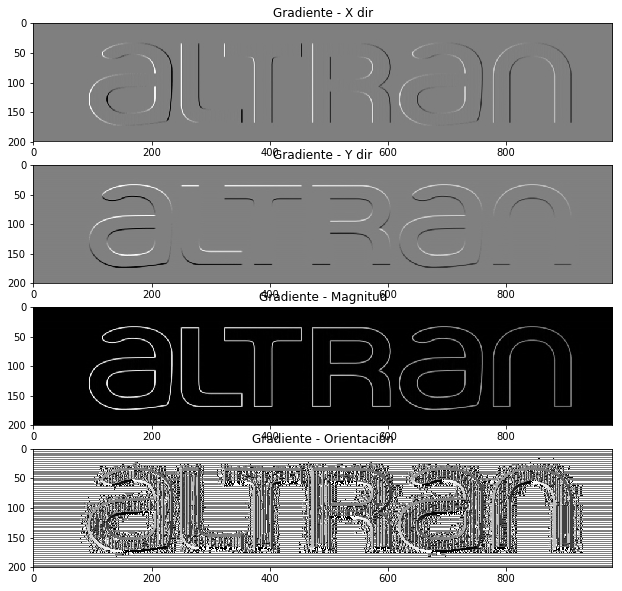

In [22]:
# Definimos los filtros.
filtro_gradiente_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filtro_gradiente_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Aplicamos los filtros.
gx = ndi.convolve(img_grayscale, filtro_gradiente_x)
gy = ndi.convolve(img_grayscale, filtro_gradiente_y)

# Calculamos la magnitud y la orientación
mag = np.sqrt((gy*gy) + (gx * gx))
ori = np.degrees(np.arctan2(gx ,gy))

# Mostramos los resultados graficamente
f, ((ax0, ax1, ax2, ax3)) = plt.subplots(4, 1, figsize=(40, 10))
ax0.imshow(gx, cmap='gray');
ax0.set_title("Gradiente - X dir");
ax1.imshow(gy, cmap='gray');
ax1.set_title("Gradiente - Y dir");
ax2.imshow(mag, cmap='gray');
ax2.set_title("Gradiente - Magnitud");
ax3.imshow(ori, cmap='gray');
ax3.set_title("Gradiente - Orientación");



### Histograma de los bloques

Demo parecida a la de los filtros que nos permite comprender mejor que procedimiento hace el algoritmo en esta fase.

In [23]:
# Este método es útil para dividir una imagen en especificando ciertos parámetros
from skimage.util.shape import view_as_windows
# Este solo lo usamos para crear el ejemplo interactivo
from ipywidgets import IntSlider, interact

# Generamos todas las ventanas posibles con las dimensiones (50, 50)
tamaño_ventana = (50, 50)
step = 50 # Si no definimos un step es de 1 y las subventanas se solapan
windows = view_as_windows(np.abs(ori.copy()),tamaño_ventana,step=50)
img_grayscale_rgb = cv2.cvtColor(img_grayscale.copy().astype(np.uint8),cv2.COLOR_GRAY2RGB)

def show_window(iteration):
    """
    Muestra para la iteración n el histograma de los bloques.
    
    Parameters
    ----------
    iteration: int
        Número de iteración actual.
    """
    
    # Define el número de gráficos que mostraremos.
    fig = plt.figure(figsize=(15, 15))
    ax0 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    ax1 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
    ax2 = plt.subplot2grid((2, 2), (1, 1), rowspan=2)

    # Tamaño de la subventana
    num_rows, num_cols = tamaño_ventana
    
    # Calcula usando la iteración actual en que posición de la imagen estamos
    pos0 = int(iteration % windows.shape[1]) * step
    pos1 = int(iteration / windows.shape[1]) * step
    
    # Dibuja un cuadrado en la imagen y muestralo en la primera gráfica.
    img_slide= cv2.cvtColor(mag.copy().astype(np.uint8) * 255,cv2.COLOR_GRAY2RGB)
    cv2.rectangle(img_slide, (pos0, pos1), (pos0 + windows.shape[1], pos1 + windows.shape[1]), ((255, 0, 0)), 2)
    ax0.imshow(img_slide, cmap='gray');
    ax0.set_title("Imagen original")
    
    # Seleciona la ventana actual en las orientaciones y muestrala en la segunda gráfica
    piece = windows[int(iteration / windows.shape[1]),
                    int(iteration % windows.shape[1]), :, :]
    ax1.imshow(piece, cmap='gray')
    ax1.set_title("Orientaciones")
    
    # Compute and show the histogram
    hist, bin_edges = np.histogram(piece, bins = range(0, 180, 20))
    ax2.bar(bin_edges[:-1], hist, width=10)
    ax2.set_title("Histograma de las orientaciones")
    
interact(show_window, iteration=(0, windows.shape[0] * windows.shape[1]), default=0);


interactive(children=(IntSlider(value=38, description='iteration', max=76), Output()), _dom_classes=('widget-i…

### Normalización de contraste de los bloques

![ta](resources/session1/hog_contrast_normalization.gif)

### Hog descriptor
Una vez ya hemos comprendido como se implementa el descriptor, a continuación muestro un ejemplo que solo sirve para ir un paso más adelante, simplemente es una introducción a lo que debe ser un detector pero simplificado a su forma mínima.

#### Dataset

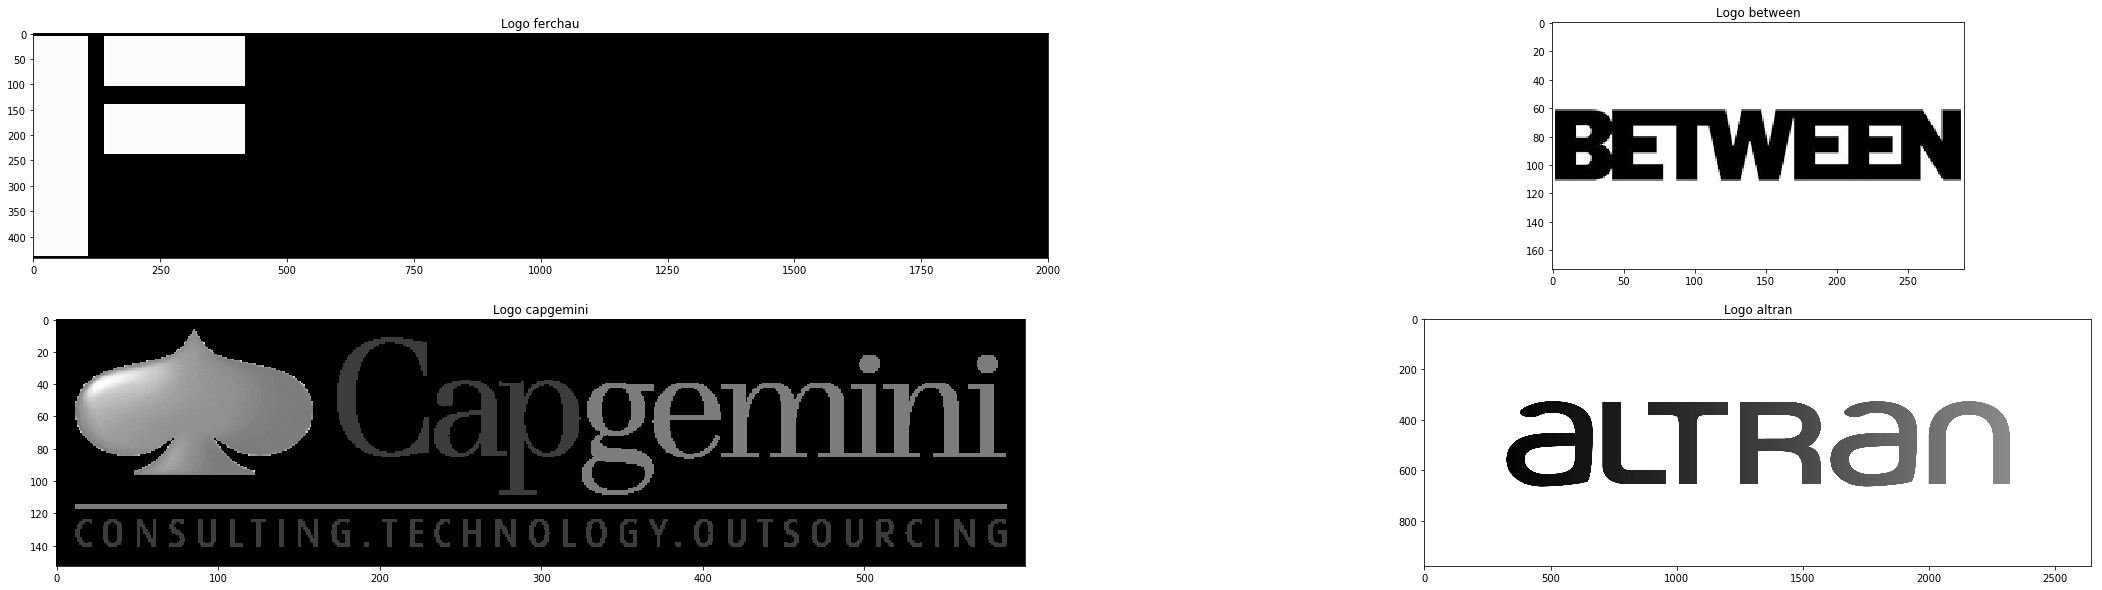

In [24]:
import os 
train_path = "resources/session1/logos/training/"

# Cargamos unos modelos de logos de ejemplo
ferchau = io.imread(train_path + "ferchau.png", as_grey=True)
between = io.imread(train_path + "between.png", as_grey=True)
capgemini = io.imread(train_path + "capgemini.png", as_grey=True)
altran = io.imread(train_path + "altran.jpg", as_grey=True)

# Mostramos las imágenes que hemos cargado
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(40, 10))
ax0.imshow(ferchau, cmap='gray');
ax0.set_title("Logo ferchau");
ax1.imshow(between, cmap='gray');
ax1.set_title("Logo between");
ax2.imshow(capgemini, cmap='gray');
ax2.set_title("Logo capgemini");
ax3.imshow(altran, cmap='gray');
ax3.set_title("Logo altran");

c:\users\carles.carmonacalpe\appdata\local\continuum\miniconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


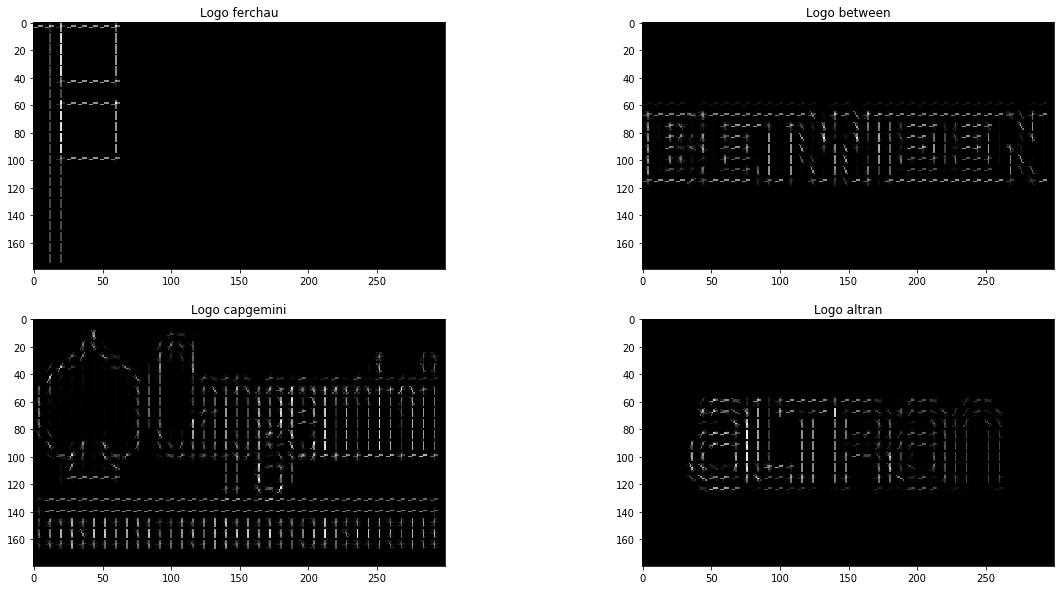

In [25]:
from skimage.transform import resize
from skimage import feature
# Redimensionar las imagenes 
width = 300
height = 180

altran = resize(altran, (180, 300))
ferchau = resize(ferchau, (180, 300))
between = resize(between, (180, 300))
capgemini = resize(capgemini, (180, 300))

# Calculamos los descriptores HOG para cada imagen
(altran_descriptor, altran_hogImage) = feature.hog(altran, orientations=9, pixels_per_cell=(8, 8),
                                                   cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
(ferchau_descriptor, ferchau_hogImage) = feature.hog(ferchau, orientations=9, pixels_per_cell=(8, 8),
                                                     cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
(between_descriptor, between_hogImage) = feature.hog(between, orientations=9, pixels_per_cell=(8, 8),
                                                     cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
(capgemini_descriptor, capgemini_hogImage) = feature.hog(capgemini, orientations=9, pixels_per_cell=(8, 8),
                                                         cells_per_block=(2, 2), transform_sqrt=True, visualise=True)

# Añadir los descriptores a un diccionario
descriptores = {}
descriptores["altran"] = altran_descriptor
descriptores["ferchau"] = ferchau_descriptor
descriptores["between"] = between_descriptor
descriptores["capgemini"] = capgemini_descriptor

# Mostramos las descriptores que hemos calculado
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(20, 10))
ax0.imshow(ferchau_hogImage, cmap='gray');
ax0.set_title("Logo ferchau");
ax1.imshow(between_hogImage, cmap='gray');
ax1.set_title("Logo between");
ax2.imshow(capgemini_hogImage, cmap='gray');
ax2.set_title("Logo capgemini");
ax3.imshow(altran_hogImage, cmap='gray');
ax3.set_title("Logo altran");

c:\users\carles.carmonacalpe\appdata\local\continuum\miniconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Resultados del Test1
********************
altran | L2 distance:15.63948922398303
ferchau | L2 distance:15.210294999275154
between | L2 distance:16.358451124362976
capgemini | L2 distance:16.09426334570196

Resultados del Test2
********************
altran | L2 distance:15.239655029572807
ferchau | L2 distance:12.510113977278126
between | L2 distance:15.974780983164646
capgemini | L2 distance:15.432386161319771


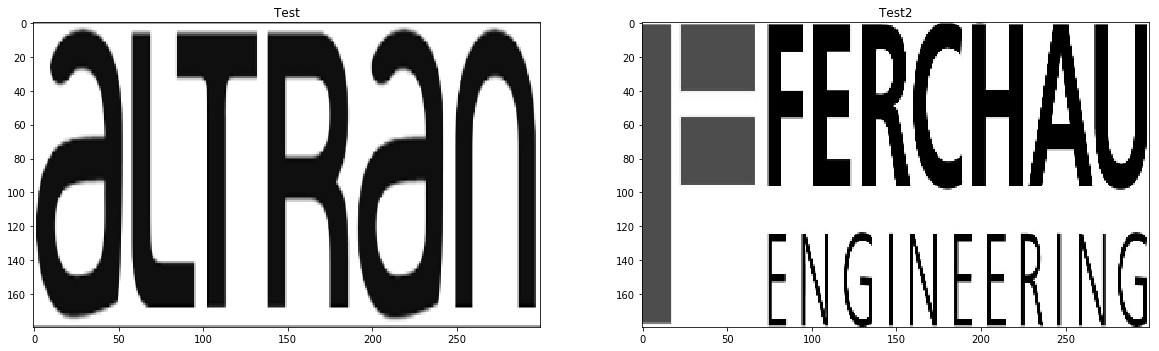

In [26]:
from sklearn.metrics import euclidean_distances

test_path = "resources/session1/logos/test/"

# Cargamos un par de imágenes desconocidas
test = io.imread(test_path + "test.png", as_grey=True)
test2 = io.imread(test_path + "test2.jpg", as_grey=True)

# Las redimensionamos
test = resize(test, (180, 300))
test2 = resize(test2, (180, 300))

# Calculamos los descriptores HOG para cada imagen
(test_descriptor, test_hogImage) = feature.hog(test, orientations=9, pixels_per_cell=(8, 8),
                                               cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
(test2_descriptor, test2_hogImage) = feature.hog(test2, orientations=9, pixels_per_cell=(8, 8),
                                                 cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
print("Resultados del Test1")
print("*" * 20)
# Miramos la distancia euclidia respecto a la primera imagen de test
for compañia in descriptores.keys():
    print(compañia, "| L2 distance:" + str(np.sqrt(np.sum((test_descriptor - descriptores[compañia]) ** 2))))

print("\nResultados del Test2")
print("*" * 20)
# Miramos la distancia euclidia respecto a la segunda imagen de test
for compañia in descriptores.keys():
    print(compañia, "| L2 distance:" + str(np.sqrt(np.sum((test2_descriptor - descriptores[compañia]) ** 2))))
    
f, ((ax0, ax1)) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(test, cmap='gray');
ax0.set_title("Test");
ax1.imshow(test2, cmap='gray');
ax1.set_title("Test2");